In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score , accuracy_score , confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
#redaing the data set
df = pd.read_csv("weatherHistory.csv")
#displaying the head
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
#describing the dataset
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [8]:
#checking for null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
#handling null values by giving arbitary value as zero
df = df.fillna(value=0)
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [10]:
#displayig 5 rows
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [11]:
#preprocessing the data removing unwanted coloumns
data_coloumns = ['Summary','Precip Type','Formatted Date']
df = df.drop(data_coloumns , axis = 1)

In [12]:
#splitting the data
X = df.drop('Daily Summary', axis = 1)

In [13]:
X.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [14]:
y = df[['Daily Summary']]
y.head()

,Daily Summary
0,Partly cloudy throughout the day.
1,Partly cloudy throughout the day.
2,Partly cloudy throughout the day.
3,Partly cloudy throughout the day.
4,Partly cloudy throughout the day.


In [15]:
#converting it int numerical
le = LabelEncoder()
y_e = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
X_train , X_test , y_train , y_test = train_test_split(X , y_e , random_state = 24 , test_size = 0.4)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((57871, 8), (38582, 8), (57871,), (38582,))

In [17]:
def funct(X , Y):
#import the linear regression model
  from sklearn.linear_model import LinearRegression

  model = LinearRegression()
  model.fit(X , Y)
  return model
model = funct(X_train , y_train)

In [18]:
model_predict = model.predict(X_test)
model_predict

array([140.90238341, 138.81055305, 167.56282673, ..., 158.94928282,
       147.46968168, 134.19221117])

In [19]:
acc_score = r2_score(y_test , model_predict)
acc_score

0.2990597799511474

In [20]:

from sklearn.linear_model import LogisticRegression
#logistic regression model
def func_log(X , Y , X_test , y_test):

     model_l = LogisticRegression()
     model_l.fit(X , Y)

     #making prediction
     model_l_p = model_l.predict(X_test)

     #predicting accuracy
     acc_sc = accuracy_score(y_test ,model_l_p)

     #classprobabilities
     class_prob = model_l.predict_proba(X_test)

     #positiveclasses
     class_p = class_prob[:,1]


     return model_l , model_l_p , acc_sc , class_prob
func_log(X_train , y_train , X_test , y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(LogisticRegression(),
 array([111, 111, 197, ..., 111, 111, 111]),
 0.22240941371624073,
 array([[4.01149926e-04, 2.29317402e-04, 2.13436765e-04, ...,
         4.88184319e-04, 2.21918029e-04, 5.50298868e-09],
        [4.38462386e-04, 1.98762731e-04, 1.86594048e-04, ...,
         5.70887400e-04, 1.97589217e-04, 3.66560392e-09],
        [2.24218981e-04, 1.75330705e-04, 1.61258601e-04, ...,
         2.46247650e-04, 1.61957417e-04, 5.55758653e-09],
        ...,
        [3.06993871e-04, 2.62184079e-04, 2.37699147e-04, ...,
         3.25697609e-04, 2.35167248e-04, 8.98008820e-09],
        [3.00126429e-04, 3.49643965e-04, 3.08144412e-04, ...,
         2.85267836e-04, 2.92367234e-04, 1.64370644e-08],
        [2.54048227e-04, 3.91965579e-04, 3.38626932e-04, ...,
         2.20742427e-04, 3.11892441e-04, 2.23449335e-08]]))

In [21]:
from sklearn.neighbors import KNeighborsClassifier
#Kneighbours
def func_k(X , Y , X_test , y_test):

  #creating model
  model_k = KNeighborsClassifier(n_neighbors = 5)
  model_k.fit(X , Y)

  #predicting the values
  model_k_p = model_k.predict(X_test)

  #accuracyscore
  ac_s = accuracy_score(y_test , model_k_p)

  return model_k , model_k_p ,ac_s

func_k(X_train , y_train , X_test , y_test)

(KNeighborsClassifier(),
 array([111, 111, 197, ..., 111,  15, 118]),
 0.24050075164584522)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#DecessionTreeClassifier

def func_d(X , Y , X_test , y_test):

  #creating the model
  model_d = DecisionTreeClassifier(criterion = 'gini')
  model_d.fit(X , Y)

  #prediction
  model_d_p = model_d.predict(X_test)

  #accuracy
  ac = accuracy_score(y_test , model_d_p)

  return model_d , model_d_p , ac
func_d(X_train , y_train , X_test , y_test)


(DecisionTreeClassifier(),
 array([132, 111, 197, ..., 111, 143,  15]),
 0.26978902078689543)

[Text(0.4156079293124607, 0.9861111111111112, 'x[5] <= 6.287\ngini = 0.928\nsamples = 57871\nvalue = [17, 16, 15, 17, 15, 16, 14, 16, 44, 31, 13, 18\n13, 14, 17, 16, 19, 16, 15, 18, 14, 14, 15, 17\n14, 31, 17, 16, 30, 556, 13, 18, 59, 146, 12\n2551, 12, 779, 13, 176, 89, 198, 79, 861, 17, 228\n14, 158, 178, 72, 16, 252, 197, 17, 18, 31, 31\n2156, 100, 73, 501, 250, 129, 1560, 321, 15, 16\n14, 17, 13, 9, 27, 58, 14, 27, 16, 17, 27, 11\n12, 47, 14, 112, 975, 24, 34, 16, 16, 39, 39, 15\n121, 30, 15, 253, 753, 124, 41, 233, 51, 77, 29\n11, 74, 165, 79, 27, 12, 89, 17, 16, 11997, 94\n14, 20, 69, 15, 15, 621, 71, 33, 26, 14, 14, 19\n14, 14, 27, 17, 14, 19, 16, 1876, 15, 8, 13, 28\n38, 16, 21, 17, 11, 11, 1774, 57, 11, 15, 99\n166, 139, 288, 10, 494, 15, 806, 234, 799, 28, 48\n14, 15, 14, 182, 17, 14, 31, 1702, 12, 11, 1277\n3163, 13, 18, 15, 15, 129, 15, 17, 43, 15, 16\n415, 14, 162, 13, 18, 17, 532, 831, 17, 59, 36\n51, 136, 19, 12, 18, 6012, 110, 13, 54, 14, 57\n33, 1975, 232, 16, 42, 60, 

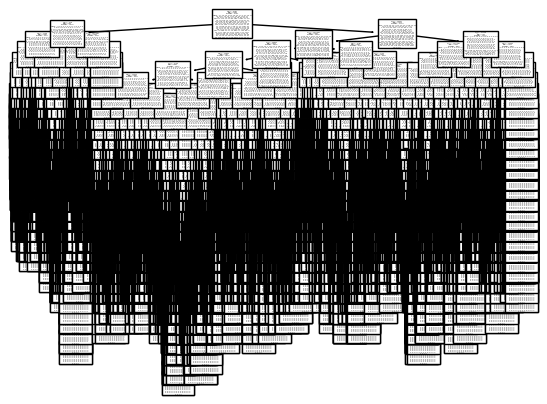

In [26]:
model_d = DecisionTreeClassifier()
model_d.fit(X_train , y_train)
tree.plot_tree(model_d)

In [27]:
from sklearn.naive_bayes import GaussianNB
#naivebayes
def func_nb(X , Y , X_test , y_test):

  #creating the model
  model_nb = GaussianNB()
  model_nb.fit(X , Y)

  #predicting
  model_nb_p = model_nb.predict(X_test)

  #accuracy
  acc_snb = accuracy_score(y_test , model_nb_p)

  return model_nb , model_nb_p ,acc_snb
func_nb(X_train , y_train , X_test , y_test)

(GaussianNB(), array([111, 111, 197, ..., 197, 111, 111]), 0.17023482452957336)

In [ ]:
from sklearn.svm import SVC
#svm
def func_sv(X , Y , X_test , y_test):

  #creating model
  model_sv = SVC(kernel = 'linear')
  model_sv.fit(X , Y)

  #predicting
  model_sv_p = model_sv.predict(X_test)

  #accuracy
  acc_sv = accuracy_score(y_test , model_sv_p)

  return model_sv , model_sv_p , acc_sv
func_sv(X_train , y_train , X_test , y_test)

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble
def func_en(X ,Y , X_test , y_test):

  #initializing models
  class1 = DecisionTreeClassifier()
  class2 = RandomForestClassifier()
  class3 = SVC()

  #creatingg the ensemble classifier model
  class_ensemb = VotingClassifier(estimators=[
      ('DT' , class1) ,
      ('RF' , class2) ,
      ('SV' , class3)
  ])

  class_ensemb.fit(X , Y)

  #predicting
  model_en_p = class_ensemb.predict(X_test)

  #accuracy
  accur_en = accuracy_score(y_test , model_en_p)

  return class1 , class2 , class3 , class_ensemb , model_en_p , accur_en
func_en(X_train , y_train , X_test , y_test)

(DecisionTreeClassifier(),
 RandomForestClassifier(),
 SVC(),
 VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                              ('RF', RandomForestClassifier()), ('SV', SVC())]),
 array([197, 111, 197, ..., 111, 143,  15]),
 0.3417655901715826)

In [ ]:
#kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = df[['od280/od315_of_diluted_wines','alcohol']]
inertia_values = []
possible_cluster_counts = range(1, 20)
for count in possible_cluster_counts:
    kmeans = KMeans(n_clusters=count, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(possible_cluster_counts, inertia_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [ ]:
#since every coloumn in categorical value converting them
data_coloumns = ['outlook','temp','humidity','wind']
le = LabelEncoder()
for column in data_coloumns:
    X[column] = le.fit_transform(X[column])
X.head()

In [ ]:
# Sample data (you can replace this with your actual data)
data = {
    'Accuracy': [0.85, 0.92, 0.78, 0.94],
    'Test Size': [0.2, 0.3, 0.25, 0.4]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Specify the Excel file path
excel_file = 'accuracy_data.xlsx'

# Write the DataFrame to an Excel file
df.to_excel(excel_file, index=False)